# simple Chatbot

In [ ]:
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from typing import  TypedDict,Literal,Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage,HumanMessage
from langgraph.checkpoint.memory import MemorySaver,InMemorySaver
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# state

class State(TypedDict):
    messages: Annotated[list[BaseMessage],add_messages]

In [3]:
llm=ChatGroq(model='llama-3.1-8b-instant')
def chat_node(state:State)->State:
    prompt=state['messages']
    response=llm.invoke(prompt)
    return {
        'messages':[response]
    }

In [4]:
#graph
# checkpointer
checkpointer=MemorySaver()
graph=StateGraph(State)

graph.add_node('Chatbot',chat_node)
graph.add_edge(START,'Chatbot')
graph.add_edge('Chatbot',END)

workflow=graph.compile(checkpointer=checkpointer)

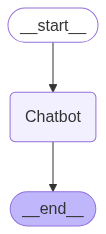

In [5]:
workflow

In [6]:
thread_id='1'
while True:
    user_input=input('Enter your message here: ')
    if user_input.strip().lower() in  ['exit','quit','bye']:
        break
    config={'configurable':{'thread_id':thread_id}}
    response=workflow.invoke({'messages':[HumanMessage(content=user_input)]},config=config)
    print("AI: ", response['messages'][-1].content)


AI:  I don't have any information about your name. I'm a conversational AI, and our conversation just started. I don't retain any information about individual users. If you'd like to share your name, I'm happy to chat with you.


In [7]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='bb7b5d5a-9943-4049-97f4-875cc1259d61'), AIMessage(content="I don't have any information about your name. I'm a conversational AI, and our conversation just started. I don't retain any information about individual users. If you'd like to share your name, I'm happy to chat with you.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 39, 'total_tokens': 90, 'completion_time': 0.056771965, 'prompt_time': 0.0650859, 'queue_time': 0.020557735, 'total_time': 0.121857865}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_2115512ff6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e16ef713-c9fe-41b3-b555-a38fd9f90f79-0', usage_metadata={'input_tokens': 39, 'output_tokens': 51, 'total_tokens': 90})]}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'ch